## Hierarchical Clustring

In [10]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
crm = pd.read_csv('/content/crime_data.csv')

In [9]:
crm.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return (x)

In [10]:
df_norm = norm_func(crm.iloc[:,1:])

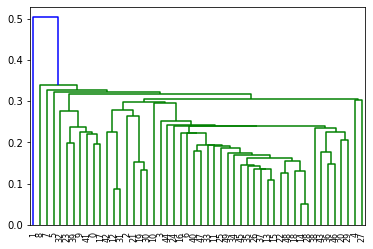

In [11]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [12]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')

In [13]:
from scipy import cluster
y_hc = hc.fit_predict(df_norm)
clusters = pd.DataFrame(y_hc, columns = ['Clusters'])

In [15]:
clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


In [19]:
crm['h_clusterid'] = clusters

In [20]:
crm

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


## K-Mean

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

In [30]:
cm = pd.read_csv('/content/crime_data.csv')

In [31]:
scaler = StandardScaler()
scaled_cm_df = scaler.fit_transform(cm.iloc[:,1:])

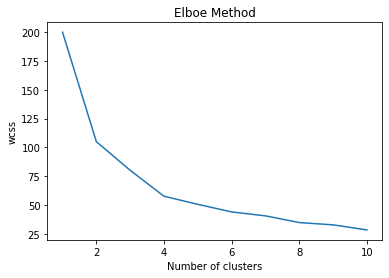

In [46]:
WCSS = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(scaled_cm_df)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1,11),WCSS)
plt.title('Elboe Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [47]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=43)
clusters_new.fit(scaled_cm_df)

KMeans(n_clusters=4, random_state=43)

In [48]:
clusters_new.labels_

array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3,
       0, 1, 3, 0, 0, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [49]:
cm['clusters_new']= clusters_new.labels_

In [50]:
cm

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,1


In [51]:
clusters_new.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [52]:
cm.groupby('clusters_new').agg(['mean']).reset_index()

,clusters_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,13.937500,243.625000,53.750000,21.412500
2,2,5.656250,138.875000,73.875000,18.781250
3,3,10.815385,257.384615,76.000000,33.192308


In [53]:
cm

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,1


## DBSCAN

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [13]:
ir = pd.read_csv('/content/crime_data.csv')

In [15]:
ir.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
ir.drop(['Unnamed: 0'],axis=1,inplace=True)
ir

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [17]:
array=ir.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [18]:
from numpy.core.numeric import array_equal
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)

In [38]:
dbscan = DBSCAN(eps=1.2, min_samples=6)
dbscan.fit(x)

DBSCAN(eps=1.2, min_samples=6)

In [39]:
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0])

In [40]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,0
4,-1
5,-1
6,0
7,0
8,-1
9,-1


In [41]:
pd.concat([ir,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
